In [30]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# %load_ext autoreload
# %autoreload 2

# # import importlib
# # importlib.reload(pyCompute)

## Case Setting

In [58]:
Pe=0.001
DO2 =4.87334E-06
w = 30e-6
U_0   = Pe*DO2/w
rhof =6.0533
rhoST= 1.2758
pixelResolution=0.5e-6
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*rhof/rhoST} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*60*rhof/rhoST} m3/(m2 h) ")

print("----reference----")
print(f"reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  ")
print(f"recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)")
print(f"usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)")
print(f"Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [cf rate: 0.15m/d] ")


average inlet velocity: 0.00016244466666666667 m/s
air flux: 0.00974668 m3/(m2 min) 
air flux at ST: 0.046245162285624704 m3/(m2 min) 
air flux at ST: 2.7747097371374823 m3/(m2 min) 
----reference----
reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  
recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)
usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)
Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [cf rate: 0.15m/d] 


### Comments
air flux is comparable to the reservoir conditions

In [33]:
import math 
length=30e-6
k=9.72e6*math.exp(-15767.38032/573)
Da=k*length/length
Da

1.0891292241536708e-05

## Min/Max fields

In [34]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-3_modifiedRPM/postProcessing/minMaxComponents2/62.51/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-3_modifiedRPM/postProcessing/minMaxMagnitude/62.51/fieldMinMax.dat"
sampling_rate=1

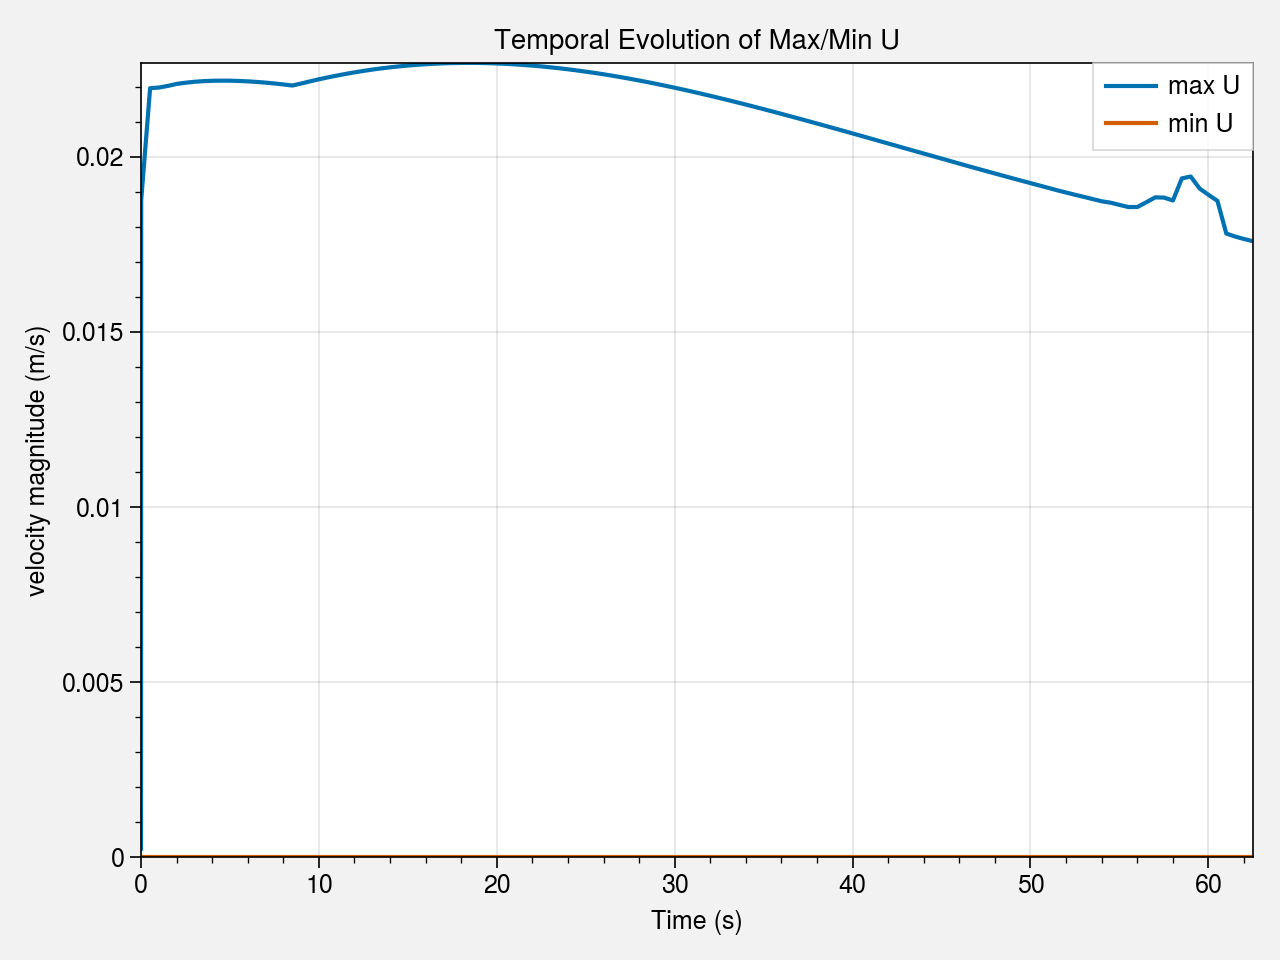

In [35]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

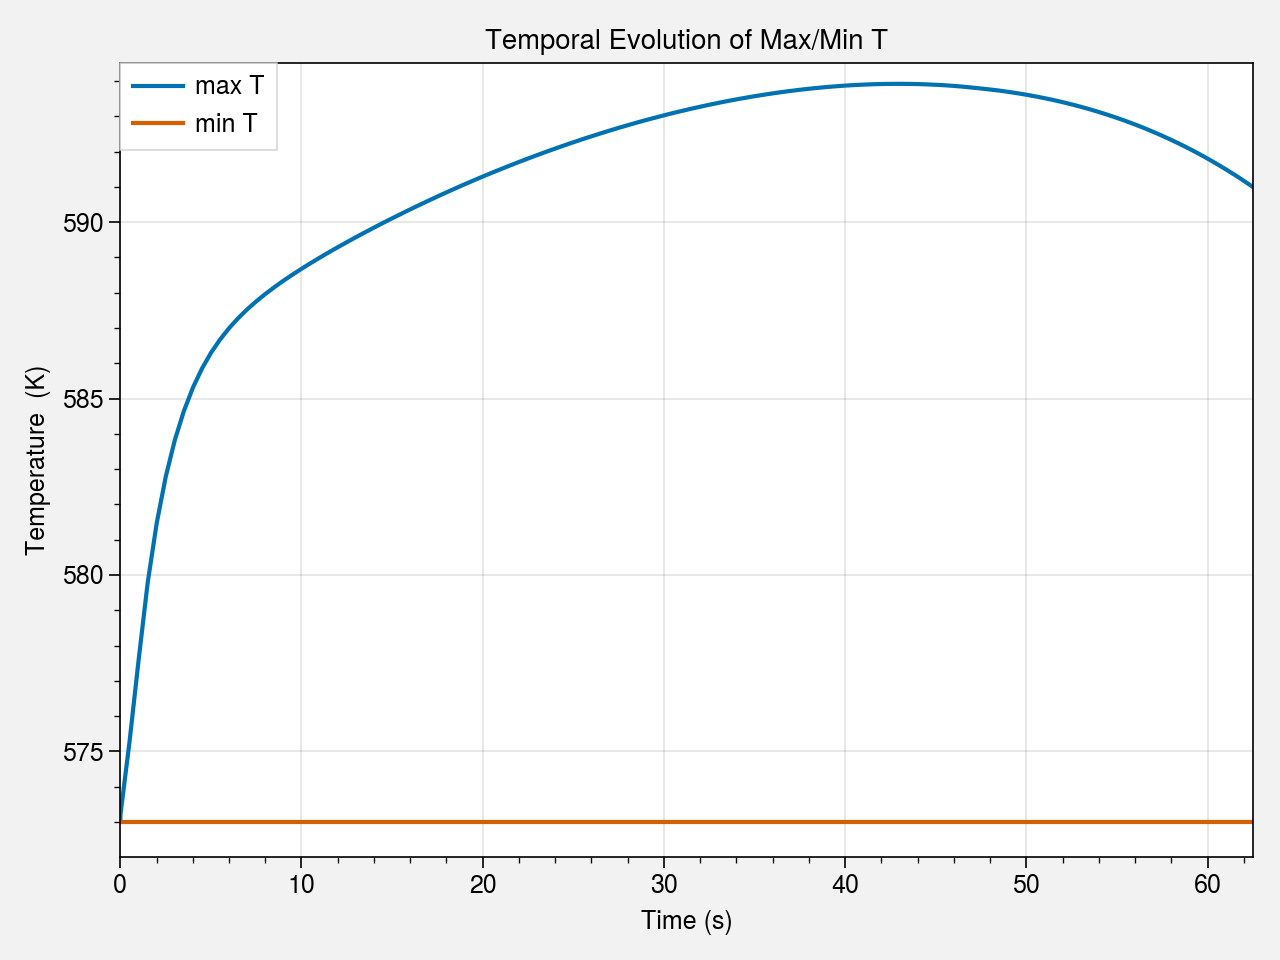

In [36]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  (K)")
ax.set_ylim([572,ax.get_ylim()[1]*1.001])
fig.tight_layout()

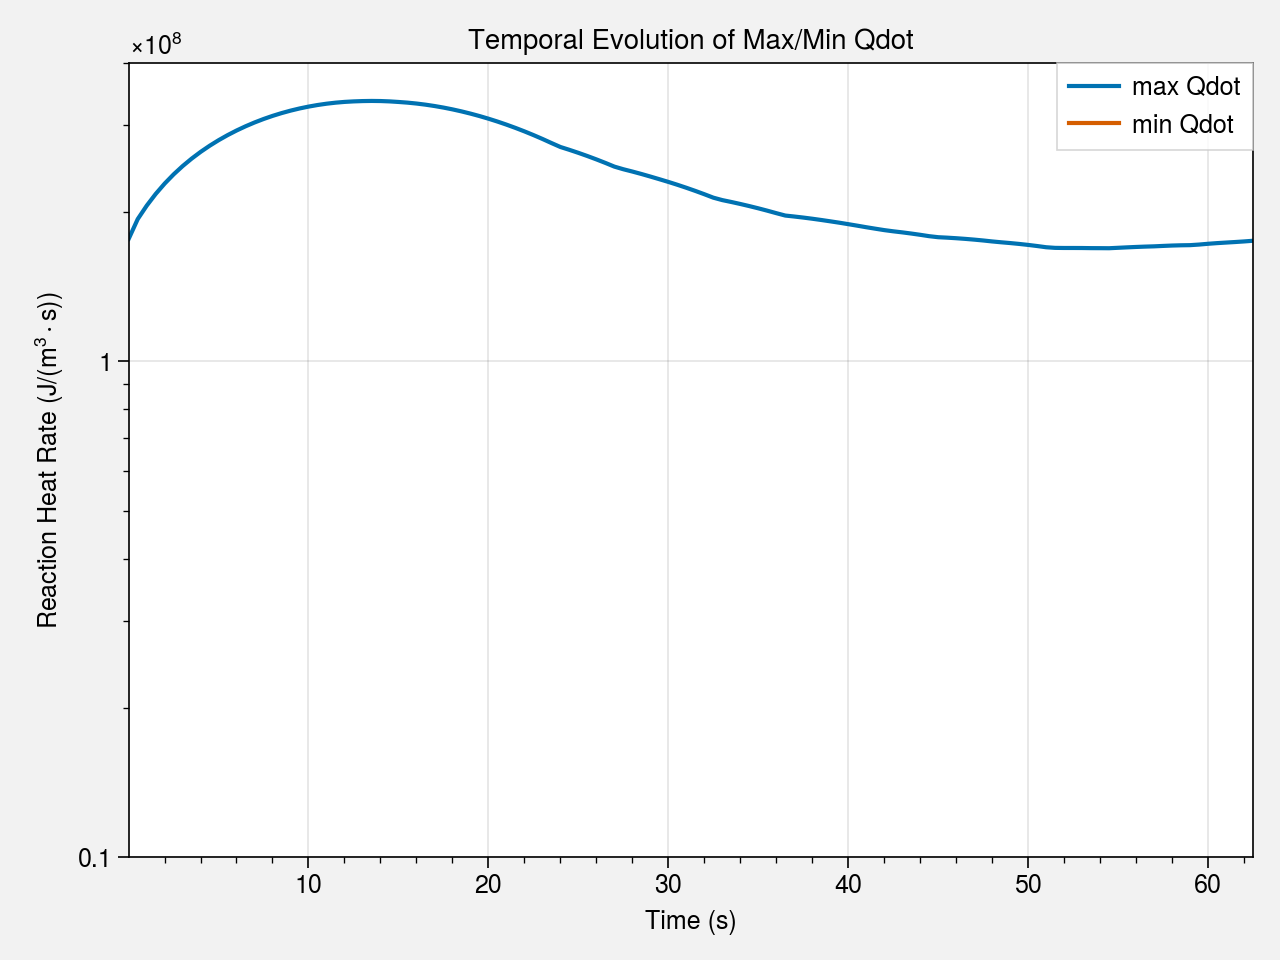

In [37]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
ax.set_ylim([1e7,4e8])
fig.tight_layout()

## Trasversly averaged fields

In [38]:
# workerNum=8
# compute_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")
# pyCompute.batchComputeTransverselyAverages(data_folder,compute_data_folder)

# # script="/home/anoldfriend/OpenFOAM/anoldfriend-7/utilities/postProcess/pyCompute.py"
# # cmd = f"python {script} -d {data_folder} -s {compute_data_folder} -t all -n {workerNum} "
# # print(cmd)
# # os.system(cmd)

In [39]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.51', '1.01', '1.51', '10.01', '10.51', '11.01', '11.51',
       '12.01', '12.51', '13.01', '13.51', '14.01', '14.51', '15.01',
       '15.51', '16.01', '16.51', '17.01', '17.51', '18.01', '18.51',
       '19.01', '19.51', '2.01', '2.51', '20.01', '20.51', '21.01',
       '21.51', '22.01', '22.51', '23.01', '23.51', '24.01', '24.51',
       '25.01', '25.51', '26.01', '26.51', '27.01', '27.51', '28.01',
       '28.51', '29.01', '29.51', '3.01', '3.51', '30.01', '30.51',
       '31.01', '31.51', '32.01', '32.51', '33.01', '33.51', '34.01',
       '34.51', '35.01', '35.51', '36.01', '36.51', '37.01', '37.51',
       '38.01', '38.51', '39.01', '39.51', '4.01', '4.51', '40.01',
       '40.51', '41.01', '41.51', '42.01', '42.51', '43.01', '43.51',
       '44.01', '44.51', '45.01', '45.51', '46.01', '46.51', '47.01',
       '47.51', '48.01', '48.51', '49.01', '49.51', '5.01', '5.51',
       '50.01', '50.51', '51.01', '51.51', '52.01', '52.51', '53.01',
       '53.51', '54.01'

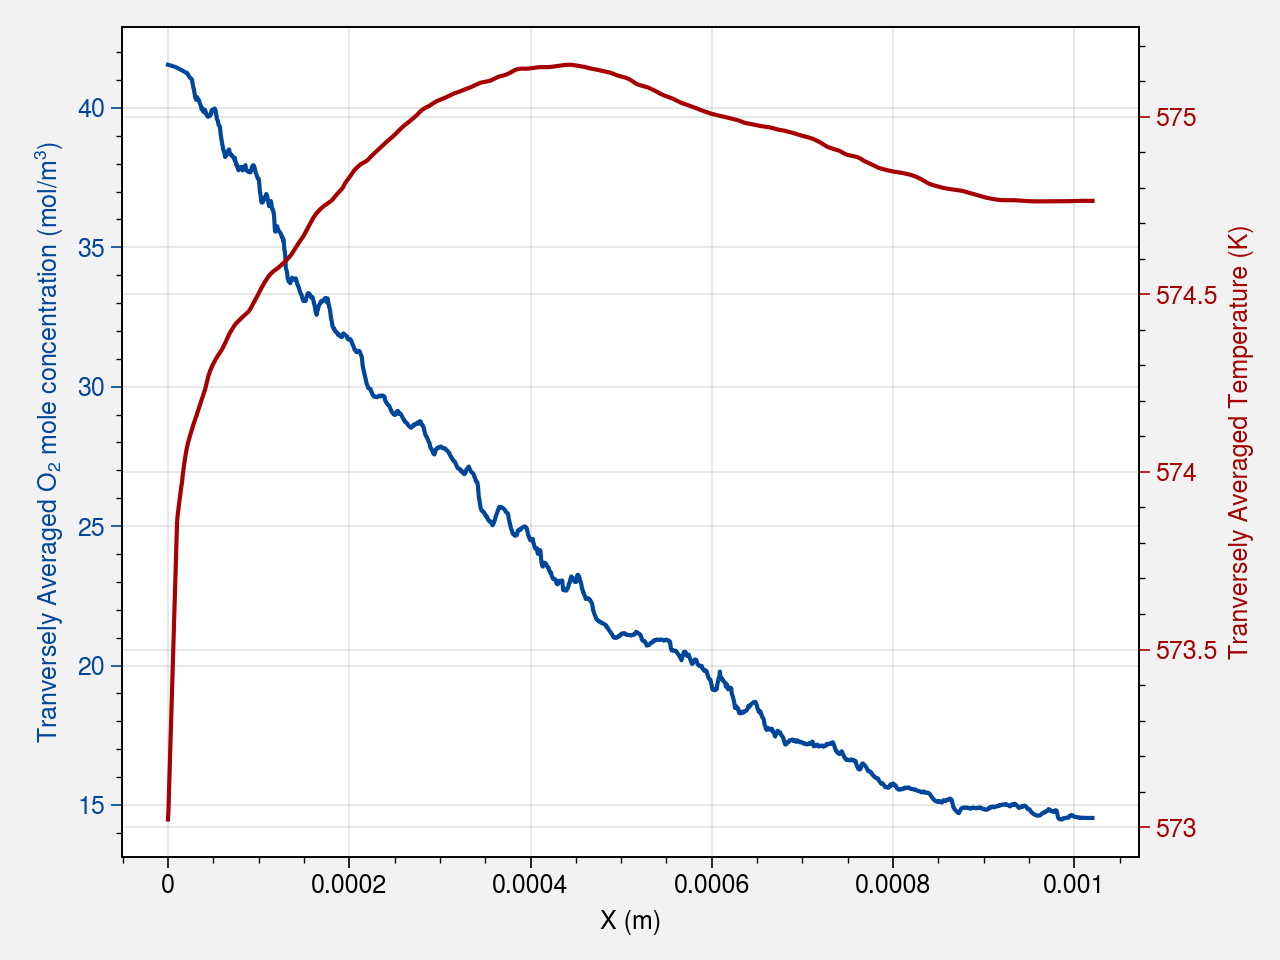

In [40]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.51")

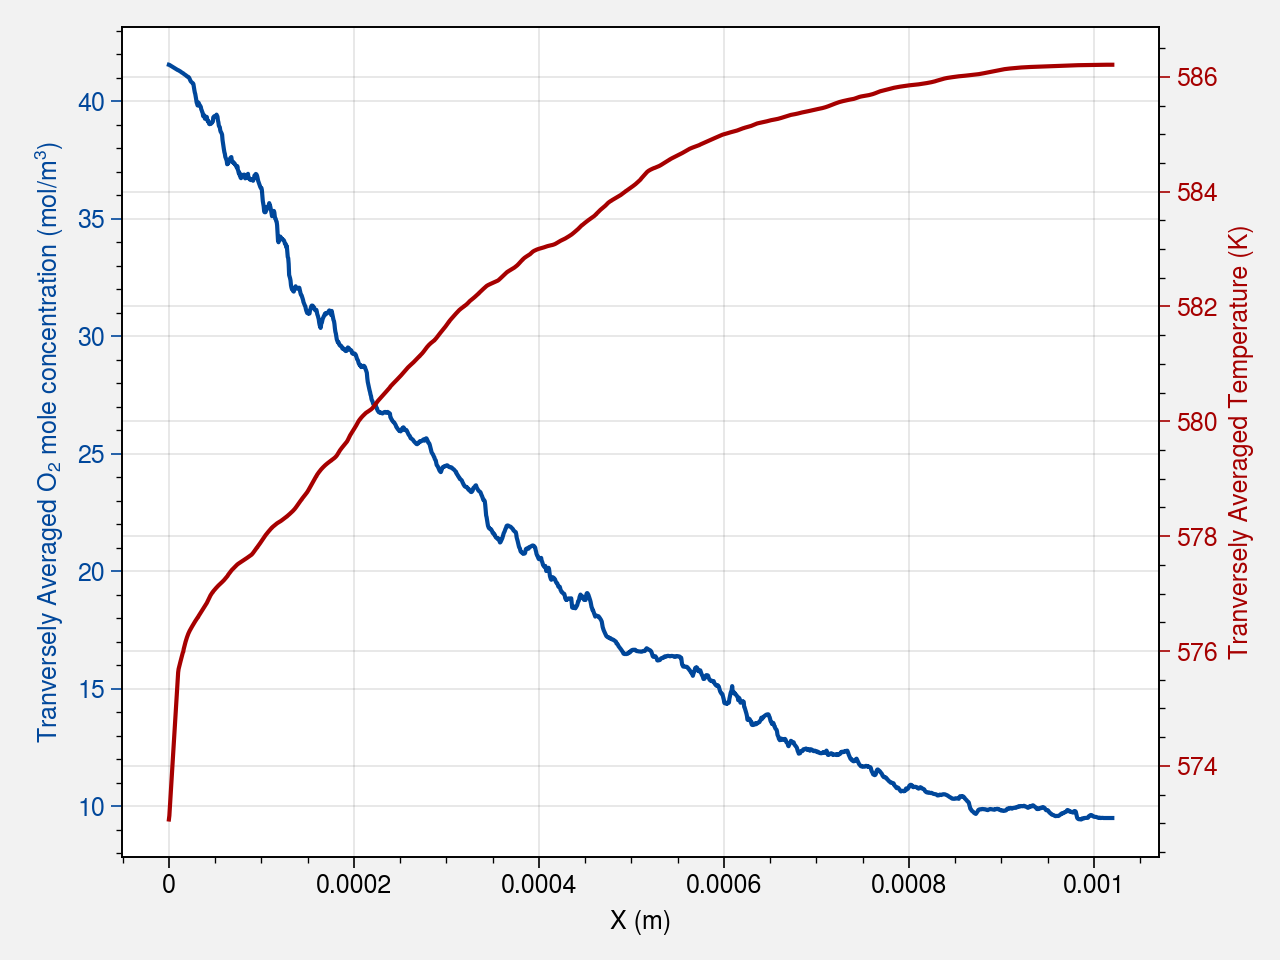

In [41]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"5.01")

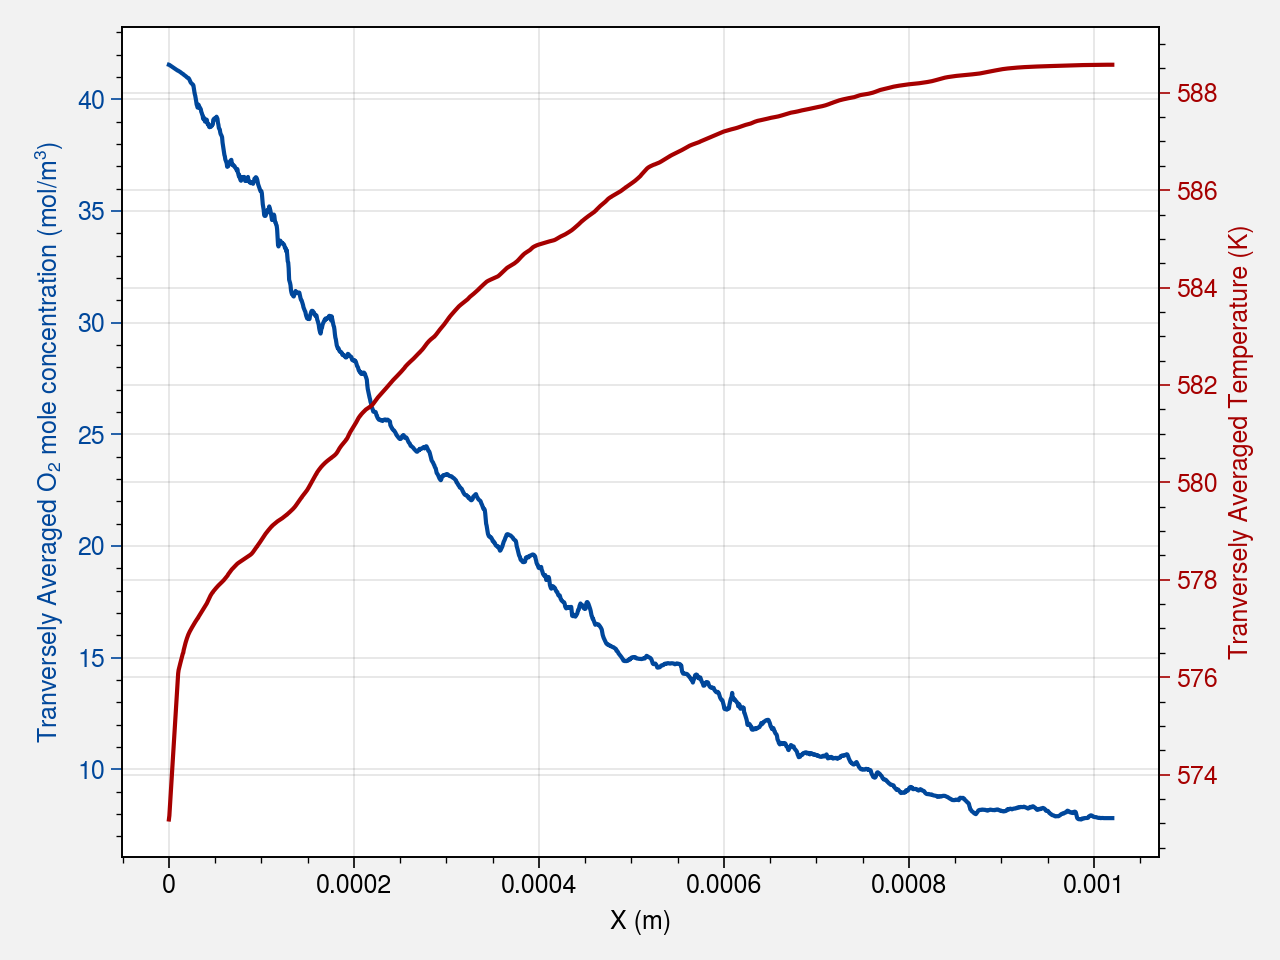

In [42]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"10.01")

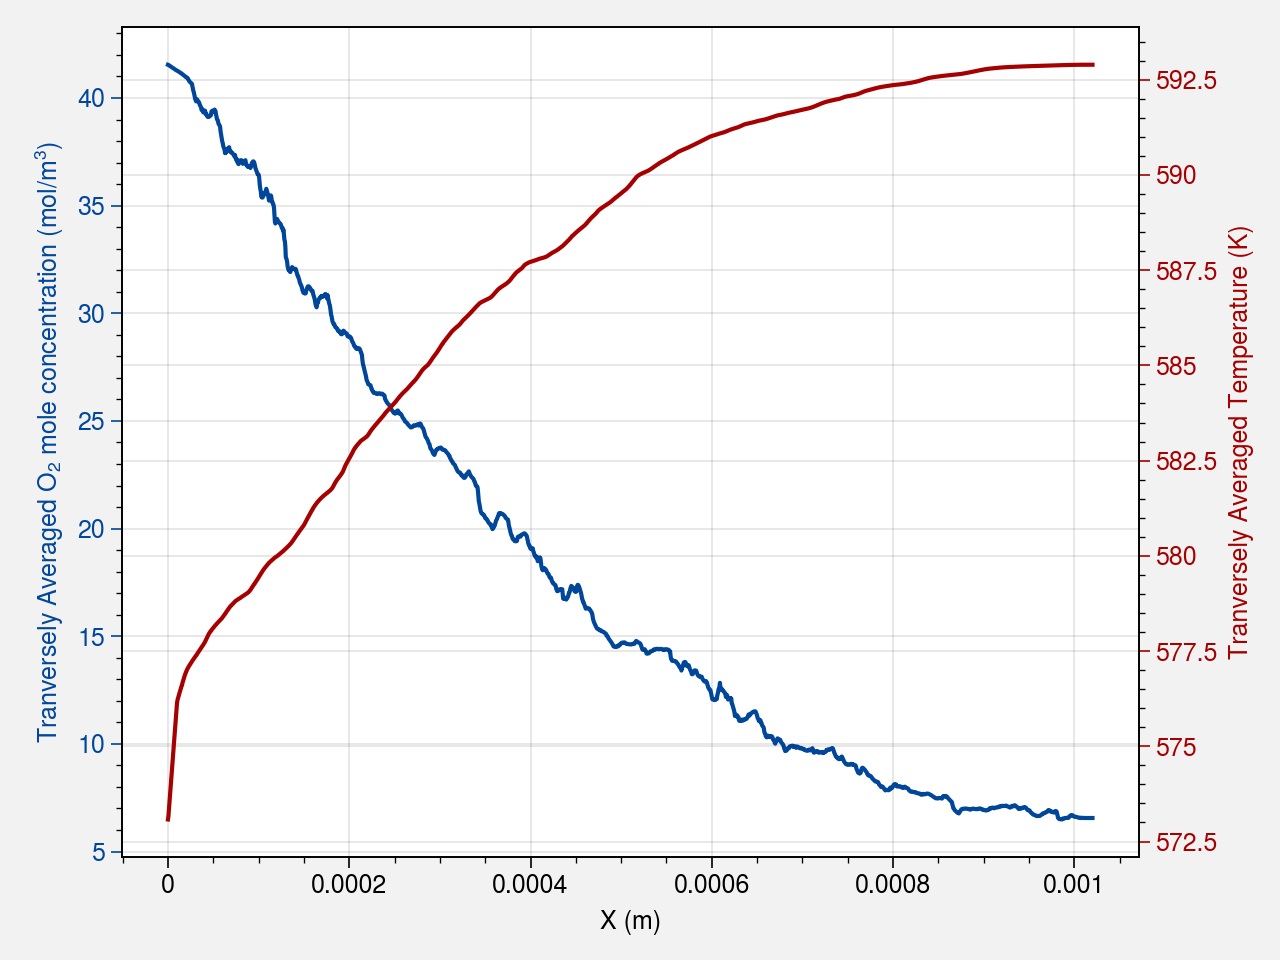

In [43]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"30.01")

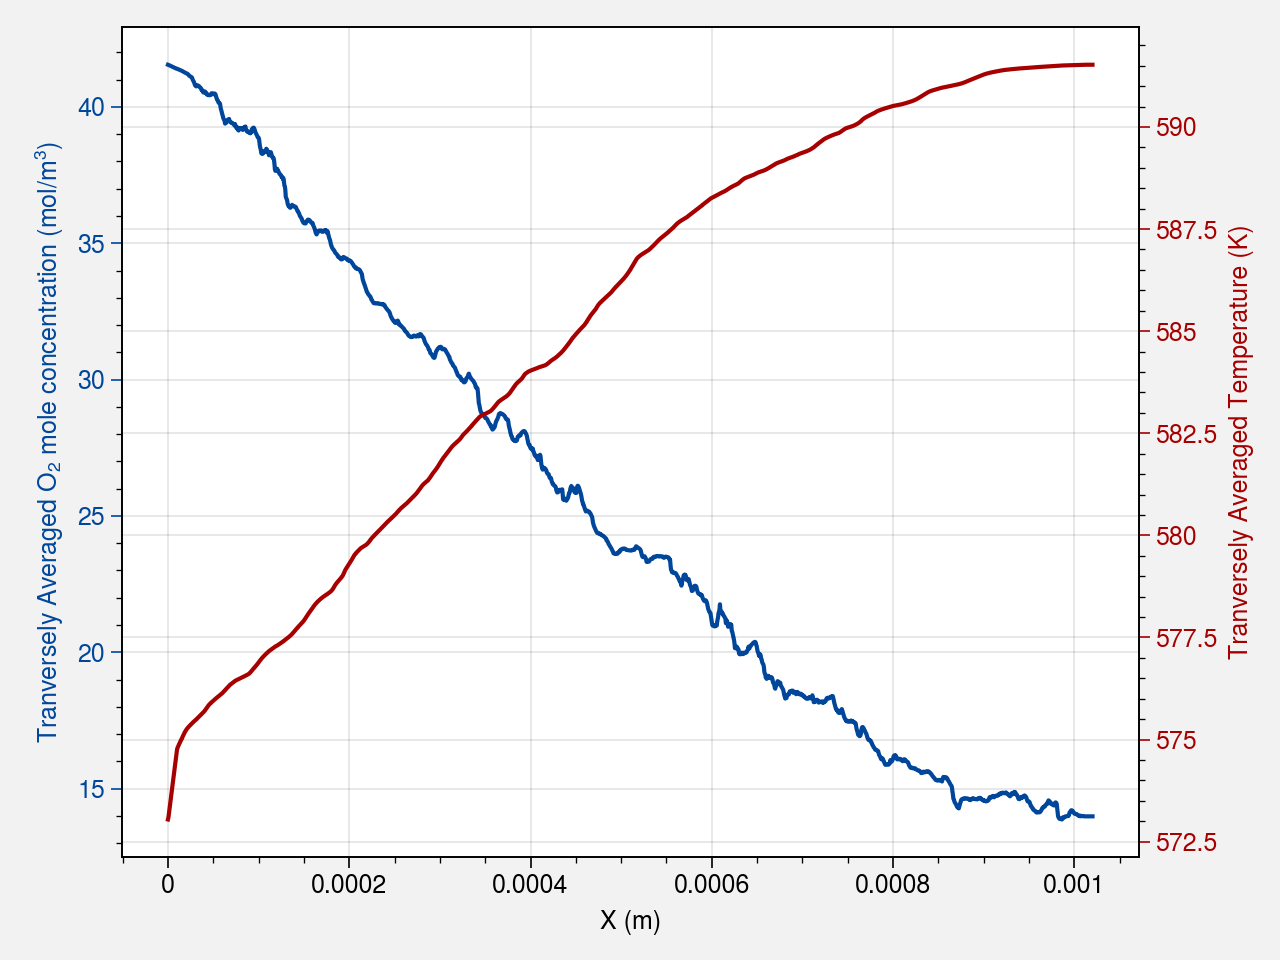

In [44]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"60.01")

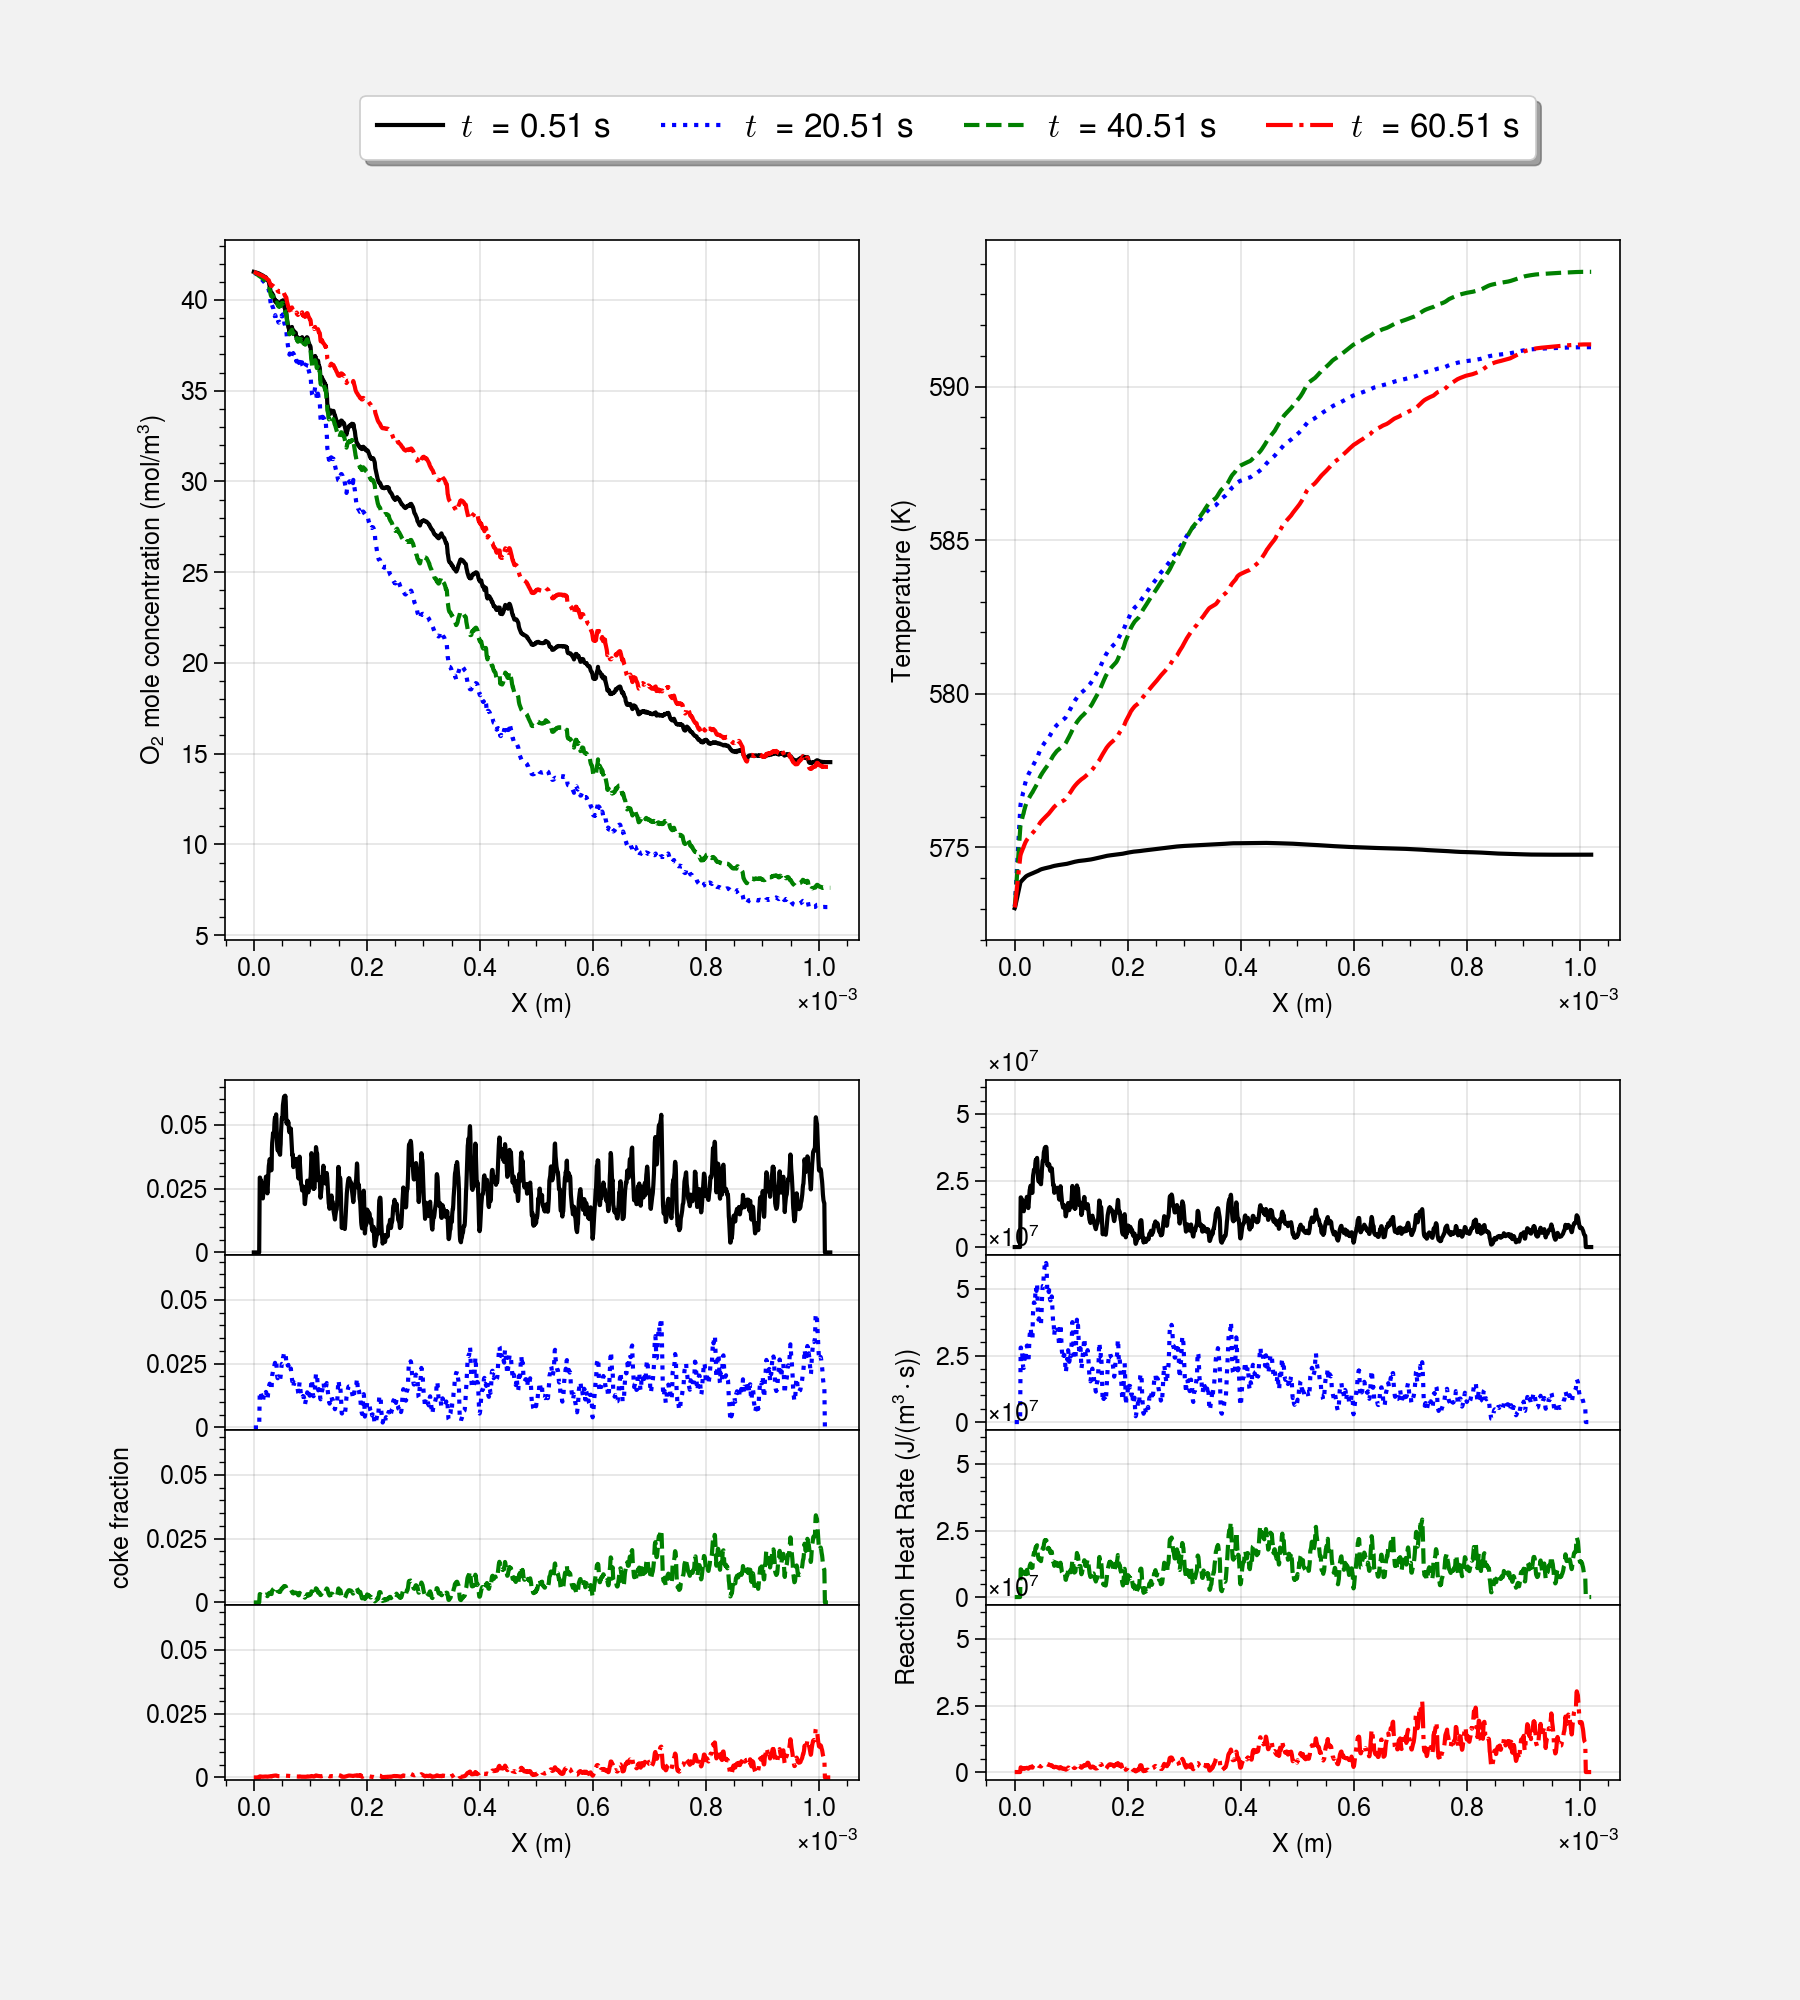

In [45]:
times=["0.51","20.51","40.51","60.51"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


### comments:
1. the coke fraction over the full domain decreased slowly with time, not limited to the local section as the diffusion-limited or the advection-limited case
2. the oxygen concentration within the domain decrease and then increased due to the specific reactive surface area with the burning rate
3. the combustion temperature increased slowly, and the maximum combustion temperature occurs close to the outlet due to the heat transfer and chemical reactions. The maximum temperature increase and then decrease due to the changing burning rate with the specific surface area
4. the reaction occur inside all the coke over the domain when using RPM model. It is the new numerical model's advantage to achieve bether physical modelling in the kinetics-limited regime. The section close to the inlet has higher reaction rate compared to the downstream due to the high O2 concentration
5. the combustion front expand all over the domain
6. The inlet O2 molar concentration is about 40 mol/m3, the outlet is over 10 mol/m3, 

In [46]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

(0.0, 0.5)

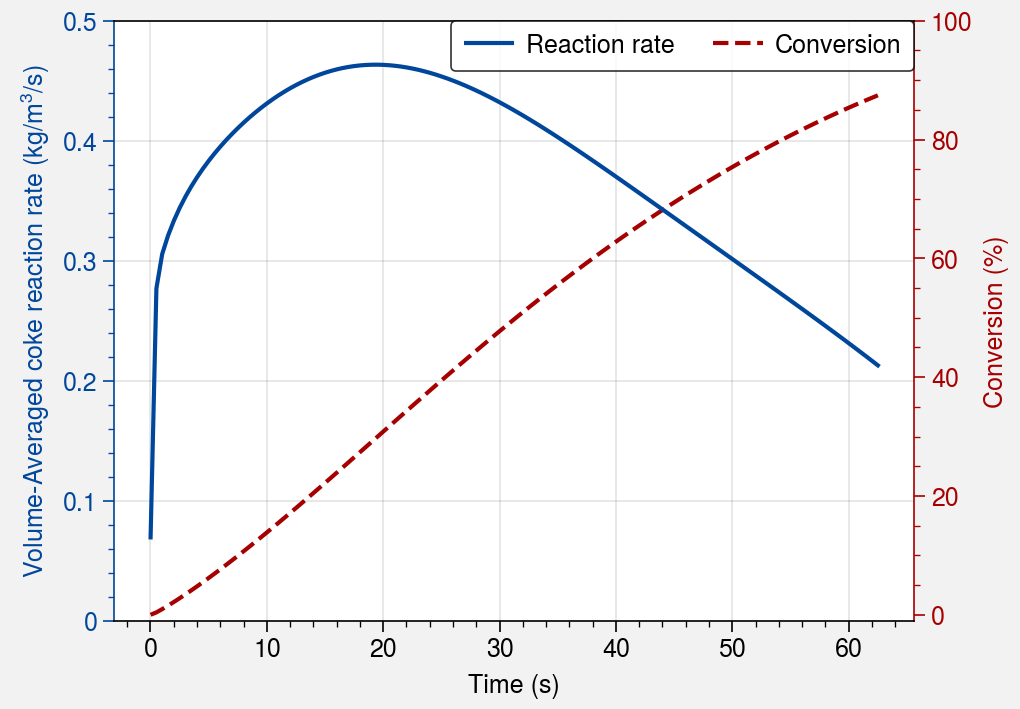

In [60]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")

ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)
ax1.set_ylim([0,0.5])

## comments:
1. the volume-averaged coke reaction rate change similar to the surface area with the burning rate, which reach the maximum when the burning rate reach about 0.40 (howerver, the initial burning rate relative to 100% coke is 30%, therefore, the peak occur at the "calculated" burning rate of 10%, where the calculated burning rate is relative to 70% coke)  

In [61]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

In [49]:
df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

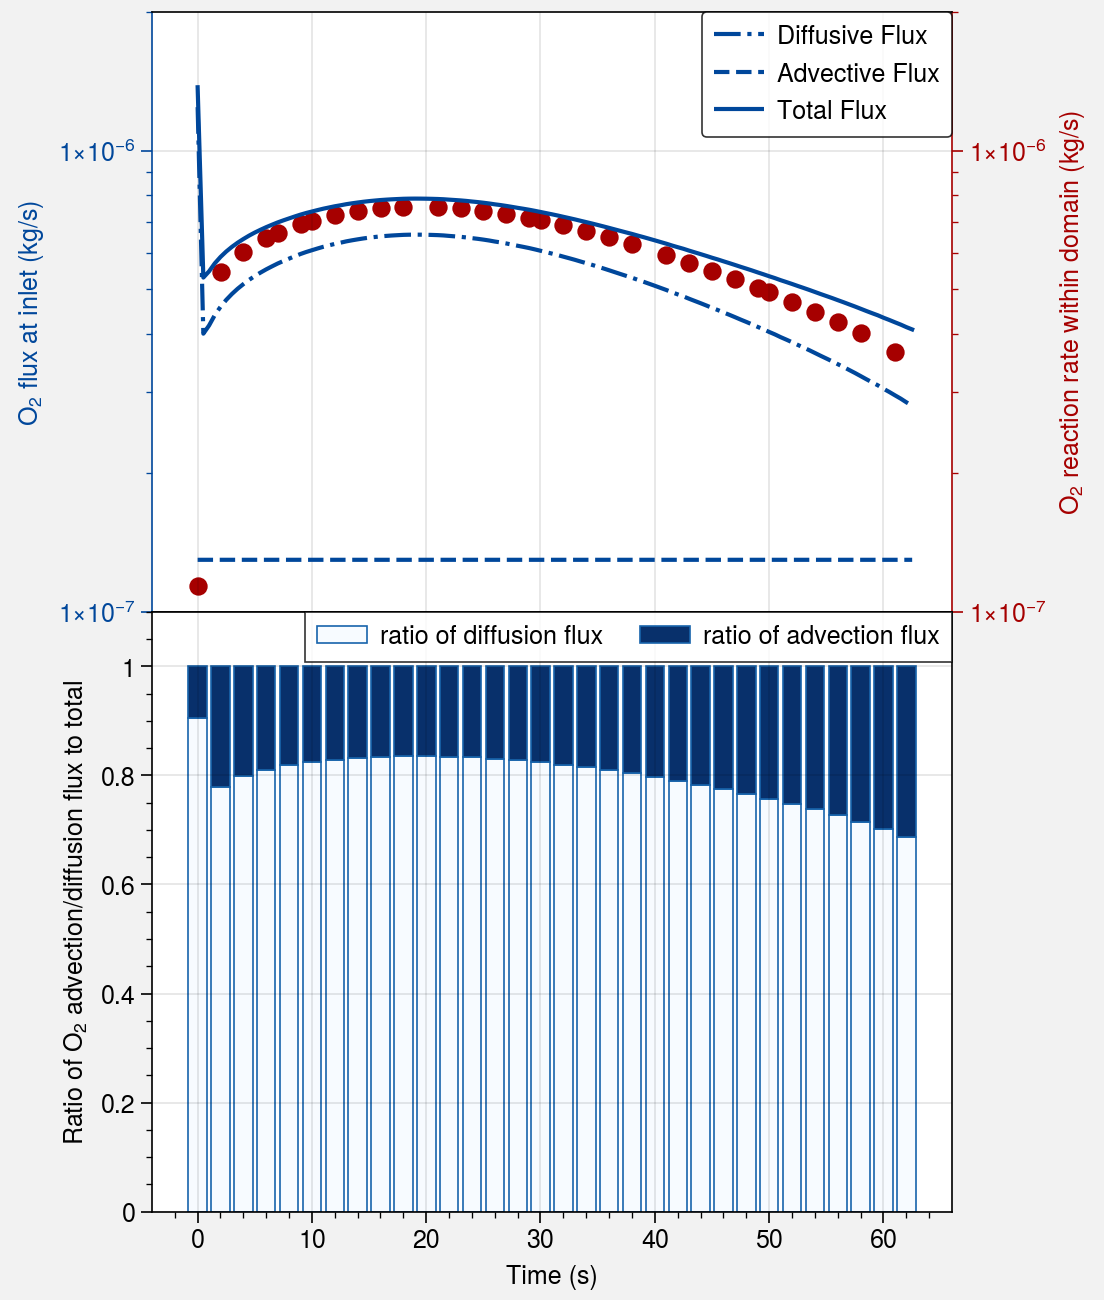

In [50]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=4,ylim=(1e-7,2e-6))


### Comments
1. the diffusion dominate the O2 species transfer
2. At the initial stage, the total chemical reaction rate is lower than the O2 flux since the O2  accumulate inside the domain with the increasing O2 concentration 

In [51]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

In [56]:
df_O2_flux_at_inlet.loc[125,"total_flux"]

4.0934551687455324e-07

In [57]:
rhoST= 1.2758
area=0.5e-6*1200

sm3=df_O2_flux_at_inlet.loc[125,"total_flux"]/rhoST
flux2=sm3/area  #sm3/m2/s
flux2*60*60  #sm3/m2/h

1.9251239232225423

## Show the max temperature and O2 concentration at the outlet

In [52]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 32.0)

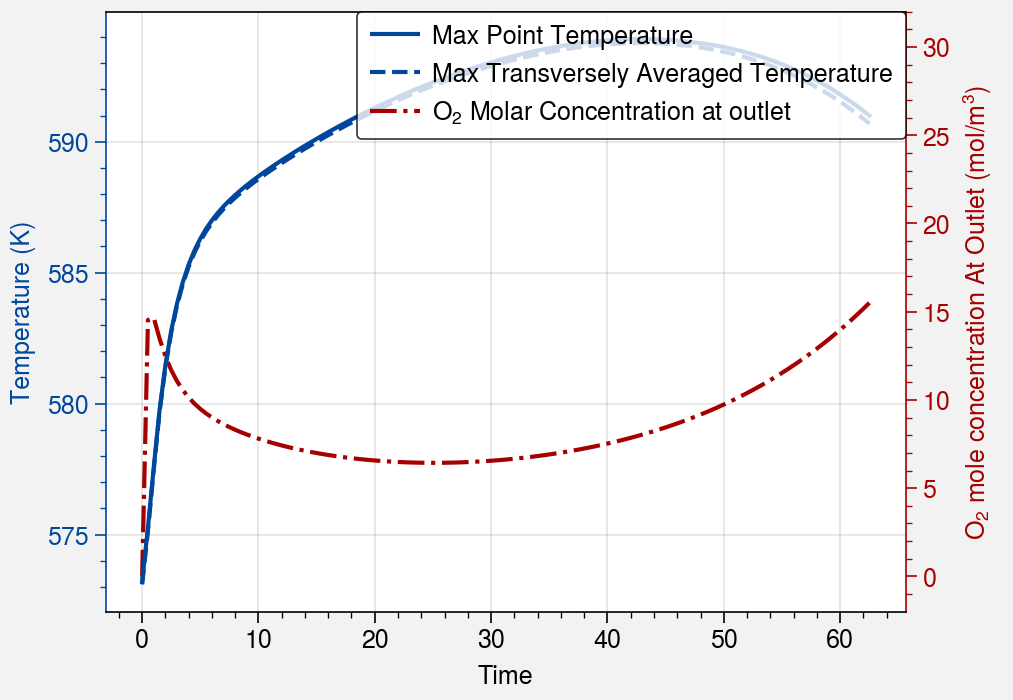

In [53]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,32])

### Comments
1. O2 leakage outside the domain, with lower Oxygen utilization
2. At the initial stage, no intensive combustion temperature is observed like the higher initial firing temperature 


In [54]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')